<h1><center> Assignment 1: EDA United Nations General Debate Corpus, Military analysis  </center></h1>

Import the files containing speeches from year 1970 until 2020 and turn it into a data frame.

In [19]:
import os
import numpy as np
import pandas as pd
from pandas import DataFrame
import re
from nltk.probability import FreqDist
import seaborn as sns
import matplotlib.pyplot as plt



# Code provided by lab 3
sessions = np.arange(25, 76)
data=[]

for session in sessions:
    directory = "./TXT/Session "+str(session)+" - "+str(1945+session)
    for filename in os.listdir(directory):
        f = open(os.path.join(directory, filename), encoding = 'utf8')
        if filename[0]==".": #ignore hidden files
            continue
        splt = filename.split("_")
        data.append([session, 1945+session, splt[0], f.read()])

        
df_speech = pd.DataFrame(data, columns=['Session','Year','ISO-alpha3 Code','Speech'])


In [20]:
# Country names and code dataset
iso = pd.read_csv('country_ISO.csv')

Import file containing general information about counties taking part in the UNSD.

In [21]:
df_codes = pd.read_csv('UNSD — Methodology.csv') # see: https://unstats.un.org/unsd/methodology/m49/#changes

Combine the speech data frame and the general information data frame.

In [22]:
df = df_speech.merge(df_codes, on="ISO-alpha3 Code", how="left") # A left join is used as we want the
                                                                 # data to be joined for every row
df.set_index(["Year"], inplace = True)                           # Creates indexed data frame



The Natural Language Toolkit (NLTK) will be used for pre-processing and text analysis.

In [23]:
import nltk
from nltk.probability import FreqDist


nltk.download("wordnet")
nltk.download("stopwords")
nltk.download('punkt')

from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words("english"))

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Gebruiker\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Gebruiker\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Gebruiker\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Importing local lexicon, created from this source: https://myvocabulary.com/word-list/war-vocabulary/

In [24]:
with open('war_lexicon.txt') as file:
    war = file.readlines()

Tokenization and Lemmatization of the lexicon:

In [26]:
def make_lexicon(text):                                          # Resource used: https://monkeylearn.com/blog/text-cleaning/
    text = text.lower()                                          # Set all text to lower string
    text = re.sub(r"http.*?(?=\s)", "", text)                    # Remove URL's
    text = re.sub(r"[^A-z\s]", "", text)                         # Remove punctuation and numbers
    text = re.sub(" +", " ", text)                               # Remove multiple spaces
    text = re.sub("united nations", "UN",text)
    text = re.sub("(^| ).( |$)", " ", text)                      # remove single letters
    
    word_tokens = nltk.word_tokenize(text)
        
    filtered_text = [] 

    for token in word_tokens:                                    # Remove stop words
        if token not in stop_words:
            filtered_text.append(token) 
    
    lemmatized_text = []
    
    for word in filtered_text:                                   # Group words having the same meaning
         lemmatized_text.append(lemmatizer.lemmatize(word))
      
    return lemmatized_text



war_lexicon = [] ## initiate new empty list to retrieve lemmatized data
for word in war:
    war_lexicon.append(make_lexicon(word))

    

Main Tokenization and item count method is declared below:

In [27]:

def clean_string(text, item):                                          # Resource used: https://monkeylearn.com/blog/text-cleaning/
    text = text.lower()                                          # Set all text to lower string
    text = re.sub(r"http.*?(?=\s)", "", text)                    # Remove URL's
    text = re.sub(r"[^A-z\s]", "", text)                         # Remove punctuation and numbers
    text = re.sub(" +", " ", text)                               # Remove multiple spaces
    text = re.sub("united nations", "UN",text)
    text = re.sub("(^| ).( |$)", " ", text)                      # remove single letters
    
    word_tokens = nltk.word_tokenize(text)
    
    
    filtered_text = [] 

    for token in word_tokens:                                    # Remove stop words
        if token not in stop_words:
            filtered_text.append(token) 
    
    lemmatized_text = []
    
    for word in filtered_text:                                   # Group words having the same meaning
         lemmatized_text.append(lemmatizer.lemmatize(word))
      

    
    count = [] ## local list
    
    for it in item: ## loop to test through lexicon
        for i in it: ## nested loop as it is a list of lists
            count.append(lemmatized_text.count(i)) ## appending to local list


    return sum(count) #returning sum of local list after each call to the method


In [28]:
df.groupby(by='Year')['ISO-alpha2 Code'].value_counts()

Year  ISO-alpha2 Code
1970  AL                 1
      AR                 1
      AT                 1
      AU                 1
      BE                 1
                        ..
2020  WS                 1
      YE                 1
      ZA                 1
      ZM                 1
      ZW                 1
Name: ISO-alpha2 Code, Length: 8353, dtype: int64

## Military Spending dataset:

source:
https://data.worldbank.org/indicator/MS.MIL.XPND.GD.ZS

In [30]:
df_mil = pd.read_excel("Military_exp.xlsx")
df_mil.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,NaN,NaN,NaN,NaN,1.992565e+14,2.379536e+14,...,1.616019e+14,1.812784e+14,1.873677e+14,1.680094e+14,1.448881e+14,1.399912e+14,1.176441e+14,1.129027e+14,1.157932e+14,NaN
2,Afghanistan,AFG,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.175416e+14,1.076950e+14,1.298013e+14,9.945758e-01,9.567721e-01,9.452268e-01,1.006746e+14,1.118231e+14,1.369684e+14,NaN
3,Africa Western and Central,AFW,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,NaN,NaN,1.319932e+14,1.316581e+14,1.436651e+14,1.471695e+14,...,7.521335e-01,8.158625e-01,7.958197e-01,7.200211e-01,8.980386e-01,8.840194e-01,9.199004e-01,8.706447e-01,1.004353e+13,NaN
4,Angola,AGO,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,3.236659e+13,4.455239e+14,4.698455e+14,3.105426e+13,2.733341e+14,2.507985e+14,1.871776e+14,1.643740e+14,1.615852e+14,NaN


Which years had the highest defense budget?

In [31]:

df_mil_years = df_mil.max(axis=0, skipna=True)
print(df_mil_years)


Country Name                             Zimbabwe
Country Code                                  ZWE
Indicator Name                                YEM
Indicator Code    Military expenditure (% of GDP)
1961                            954491725768322.0
                               ...               
2017                            963578793806571.0
2018                            946920102452611.0
2019                            863769124071412.0
2020                            844759894618144.0
Unnamed: 65                     338433055518262.0
Length: 65, dtype: object


C:\Users\GEBRUI~1\AppData\Local\Temp/ipykernel_15944/2314111425.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_mil_years = df_mil.max(axis=0, skipna=True)


In [32]:

df_mil['Total'] = df_mil.mean(axis=1,skipna=True) 
df_mil['Total']

C:\Users\GEBRUI~1\AppData\Local\Temp/ipykernel_15944/3031444761.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_mil['Total'] = df_mil.mean(axis=1,skipna=True)


0               NaN
1      2.390485e+14
2      1.342933e+14
3      1.268962e+14
4      2.695137e+14
           ...     
261    8.158096e+12
262    4.498946e+14
263    2.115123e+14
264    1.631075e+14
265    3.146400e+14
Name: Total, Length: 266, dtype: float64

### Which country spends the most?

In [67]:
df_mil_country = df_mil.groupby('Country Name').aggregate(sum)
df_mil_country_top = df_mil_country.sort_values(by=['Total'], 
ascending=False).head(10)

Global Average military spending:

In [34]:
## the data set is not fitted for linplots, the table needs to be melted 
    ## First, two unnecessary colunmns are dropped and we group according to the mean of each year:

df_mil_global_avg = df_mil_country.drop(["Unnamed: 65","Total" ], 1).melt().groupby("variable").aggregate("mean")


C:\Users\GEBRUI~1\AppData\Local\Temp/ipykernel_15944/3384139534.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_mil_global_avg = df_mil_country.drop(["Unnamed: 65","Total" ], 1).melt().groupby("variable").aggregate("mean")


US military spending and use of war language:

In [35]:

text_usa = df_speech[(df_speech['Year'] >= 1970)][df_speech['ISO-alpha3 Code'] == 'USA']

item_count_usa = {"Year": [], "Count": []}  ## initialize dictionary for item count 

## Loop to retrieve and encode count in the dictionary, which will be read:

f=0
for i in text_usa['Year']:
    item_count_usa["Year"].append(i)
    item_count_usa["Count"].append(clean_string(str(text_usa.iloc[f,-1]), war_lexicon))
    f +=1


print(sum(item_count_usa["Count"]))



9001
Wall time: 0 ns


The same will be done for Pakistan:

In [36]:

# Pakistan items from 1970 until 2000 are retrieved:


text_pak = df_speech[(df_speech['Year'] >= 1970)][df_speech['ISO-alpha3 Code'] == 'PAK']

item_count_pak = {"Year": [], "Count": []}  ## initialize dictionary for item count 

## Loop to retrieve and encode count in the dictionary, which will be read:



f=0
for i in text_pak['Year']:
    item_count_pak["Year"].append(i)
    item_count_pak["Count"].append(clean_string(str(text_pak.iloc[f,-1]), war_lexicon))
    f +=1


print(sum(item_count_pak["Count"])) 


8584
Wall time: 0 ns


The same will be done for the arab world:

In [37]:
# List with arab and north afrcan countries is retrieved according to:
    #http://www.middleeastpdx.org/resources/original/geography-of-the-modern-middle-east-and-north-africa/

ara_af = ['AFG', 'ARE', 'BHR', 'DZA', 'EGY', 'IRN', 
          'IRQ', 'JOR', 'KWT', 'LBY', 'MAR', 'OMAN', 'QAT', 'SAU', 'SDN',
         'SYR', 'TUN', 'TUR', 'YEM']

item_count_ar = {"Year": [], "Count": []}  ## initialize dictionary for item count 

## isin method is called to iterate through list of codes:

text_ar = df_speech[(df_speech['Year'] >= 1970)][df_speech['ISO-alpha3 Code'].isin((ara_af))]

## we append to dict


f=0
for i in text_ar['Year']:
    item_count_ar["Year"].append(i)
    item_count_ar["Count"].append(clean_string(str(text_ar.iloc[f,-1]), war_lexicon))
    f +=1


print(sum(item_count_ar["Count"]))


130508
Wall time: 0 ns


Global war-like language used is retrieved:

In [38]:


text_global = df_speech[(df_speech['Year'] >= 1970)]


item_count_global = {"Year": [], "Count": []}  ## initialize dictionary for item count 

## Loop to retrieve and encode count in the dictionary, which will be read:


f=0
for i in text_global['Year']:
    item_count_global["Year"].append(i)
    item_count_global["Count"].append(clean_string(str(text_global.iloc[f,-1]), war_lexicon))
    f +=1


print(sum(item_count_global["Count"]))

1003846
Wall time: 0 ns


### Plotting above-wrangled data:

C:\Users\GEBRUI~1\AppData\Local\Temp/ipykernel_15944/947547464.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_mil_global_avg = df_mil_country.drop(["Unnamed: 65","Total" ], 1).melt().groupby("variable").aggregate("mean").interpolate('polynomial', order=2)


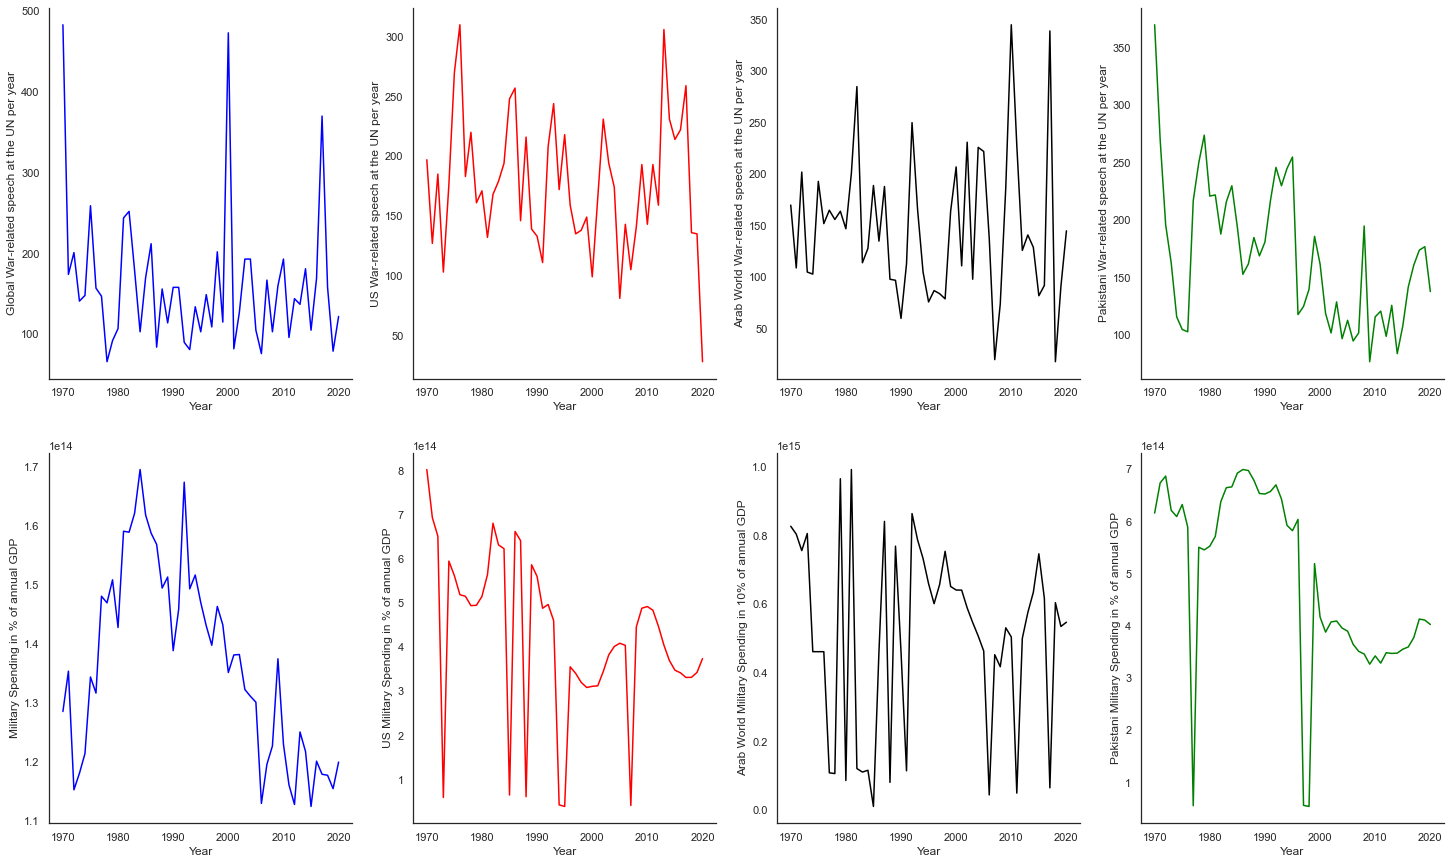

In [73]:
## Data:
    ## Global Data:
    
df_mil_global_avg = df_mil_country.drop(["Unnamed: 65","Total" ], 1).melt().groupby("variable").aggregate("mean").interpolate('polynomial', order=2)
df_mil_global_avg = df_mil_global_avg.iloc[9::].reset_index(level=0).join(pd.DataFrame(item_count_global['Count'])).rename(columns={0 : "Count"}) ## reset index and join with dict
    
    ## USA Data:
    
df_mil_usa = df_mil_country.loc["United States"].drop(["Unnamed: 65","Total" ])
df_mil_usa = df_mil_usa.iloc[9::].reset_index(level=0).join(pd.DataFrame(item_count_usa['Count'])).rename(columns={0 : "Count"})
    
    
    ## Arab World Data:
    

df_mil_arab = df_mil_country.loc["Arab World"].drop(["Unnamed: 65","Total" ])
df_mil_arab = df_mil_arab.iloc[9::].reset_index(level=0).join(pd.DataFrame(item_count_ar['Count'])).rename(columns={0 : "Count"})

## replacing null values with mean:

df_mil_arab["Arab World"] = df_mil_arab["Arab World"].replace(0, df_mil_arab["Arab World"].mean())

    ## Pakistan Data:
    

df_mil_pak= df_mil_country.loc["Pakistan"].drop(["Unnamed: 65","Total" ])
df_mil_pak = df_mil_pak.iloc[9::].reset_index(level=0).join(pd.DataFrame(item_count_pak['Count'])).rename(columns={0 : "Count"})


## Plots:

sns.set_theme(style="white")
fig, axes = plt.subplots(2, 4, figsize=(25, 15))

    ## Global:

sns.lineplot(ax=axes[1, 0], data=df_mil_global_avg, x='variable', y='value', 
             color='blue')
sns.lineplot(ax=axes[0, 0], data=df_mil_global_avg, x='variable', y='Count', 
             color='blue')

axes[1,0].set(xlabel='Year', ylabel='Military Spending in % of annual GDP')
axes[0,0].set(xlabel='Year', ylabel='Global War-related speech at the UN per year')

    ## US:

sns.lineplot(ax=axes[1, 1], data=df_mil_usa, x='index', y='United States', color='red')
sns.lineplot(ax=axes[0, 1], data=df_mil_usa, x='index', y='Count', color='red')

axes[1,1].set(xlabel='Year', ylabel='US Military Spending in % of annual GDP')
axes[0,1].set(xlabel='Year', ylabel='US War-related speech at the UN per year')

    ## Arab world:

sns.lineplot(ax=axes[1, 2], data=df_mil_arab, x='index', y= 'Arab World', color='black')
sns.lineplot(ax=axes[0, 2], data=df_mil_arab, x='index', y='Count', color='black')

axes[1,2].set(xlabel='Year', ylabel='Arab World Military Spending in 10% of annual GDP')
axes[0,2].set(xlabel='Year', ylabel='Arab World War-related speech at the UN per year')

    ## Pakistan:

sns.lineplot(ax=axes[1, 3], data=df_mil_pak, x='index', y='Pakistan', color='green')
sns.lineplot(ax=axes[0, 3], data=df_mil_pak, x='index', y='Count', color='green')

axes[1,3].set(xlabel='Year', ylabel='Pakistani Military Spending in % of annual GDP')
axes[0,3].set(xlabel='Year', ylabel='Pakistani War-related speech at the UN per year')

sns.despine()

## Find relationships with happiness dataset:

In [41]:
## the happiness dataframe is loaded:


df_happy = pd.read_excel("DataPanelWHR2021C2.xls")
df_happy.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.370100,0.450662,50.799999,0.718114,0.167640,0.881686,0.517637,0.258195
1,Afghanistan,2009,4.401778,7.539972,0.552308,51.200001,0.678896,0.190099,0.850035,0.583926,0.237092
2,Afghanistan,2010,4.758381,7.646709,0.539075,51.599998,0.600127,0.120590,0.706766,0.618265,0.275324
3,Afghanistan,2011,3.831719,7.619532,0.521104,51.919998,0.495901,0.162427,0.731109,0.611387,0.267175
4,Afghanistan,2012,3.782938,7.705479,0.520637,52.240002,0.530935,0.236032,0.775620,0.710385,0.267919


The happiness dataframe is merged with the military spending dataset:

In [42]:
## before merging we extract the columns of interest:
df_happy = df_happy.filter(items=['year', 'Life Ladder', 'Country name'])
df_happy = df_happy.groupby("Country name").aggregate("mean")


Additional wording analysis is made by grouping with top 10 happiest countries:

In [43]:
## War mentions from the happiest countries in the world is retrieved:

happy = ['DNK', 'FIN', 'CHE', 'NOR', 'NLD', 'ISL', 
          'CAN', 'SWE', 'NZL', 'AUS']
check = [x for x in happy]
# print(check)
# text = [] ## empty list to retrieve items:

item_count_happy = {"Country name": [], "Count_UN": []}  ## initialize dictionary for item count 

## isin argument is used to check through all the values in the above list
text_happy = df_speech[(df_speech['Year'] >= 1970)][df_speech['ISO-alpha3 Code'].isin((happy))]


# we append to dict

f=0
for i in text_happy['ISO-alpha3 Code']:
    item_count_happy["Country name"].append(i)
    item_count_happy["Count_UN"].append(clean_string(str(text_happy.iloc[f,-1]), war_lexicon))
    f +=1


In [44]:
## we transform the dictionary into a dataframe and group by country name:

item_count_happy = DataFrame(item_count_happy).groupby("Country name").aggregate("sum")
item_count_happy.reset_index(level=0, inplace=True)


In [45]:
## Data Frame is constructed:

df_happy_final = df_happy.sort_values(by='Life Ladder', ascending=False).head(10)
df_happy_final["Count"] = item_count_happy["Count_UN"].values
df_happy_final.reset_index(inplace=True)



We iterate for the countries with the lowest happiness score:

In [46]:
sad = ['SSD', 'CAF', 'BDI', 'TGO', 'AFG', 'RWA', 
          'TZA', 'ZWE', 'YEM', 'COM']
check = [x for x in sad]


item_count_sad = {"Country name": [], "Count_UN": []}  ## initialize dictionary for item count 

## isin argument is used to check through all the values in the above list

text_sad = df_speech[(df_speech['Year'] >= 1970)][df_speech['ISO-alpha3 Code'].isin((sad))]

# we append to dict

f=0
for i in text_sad['ISO-alpha3 Code']:
    item_count_sad["Country name"].append(i)
    item_count_sad["Count_UN"].append(clean_string(str(text_sad.iloc[f,-1]), war_lexicon))
    f +=1



In [48]:
item_count_sad = DataFrame(item_count_sad).groupby("Country name").aggregate("sum")
item_count_sad.reset_index(level=0, inplace=True)


Total mentions of war and war-related terms:

In [50]:
print("Total mentions for unhappy countries at war: ", sum(item_count_sad["Count_UN"]))
print("Total mentions for happy countries at peace: ",sum(item_count_happy["Count_UN"]))

Total mentions for unhappy countries at war:  54598
Total mentions for happy countries at peace:  54086


In [51]:

df_unhappy_final = df_happy.sort_values(by='Life Ladder', ascending=True).head(10)
df_unhappy_final["Count"] = item_count_sad["Count_UN"].values
df_unhappy_final.reset_index(inplace=True)



### Final plot for this section:

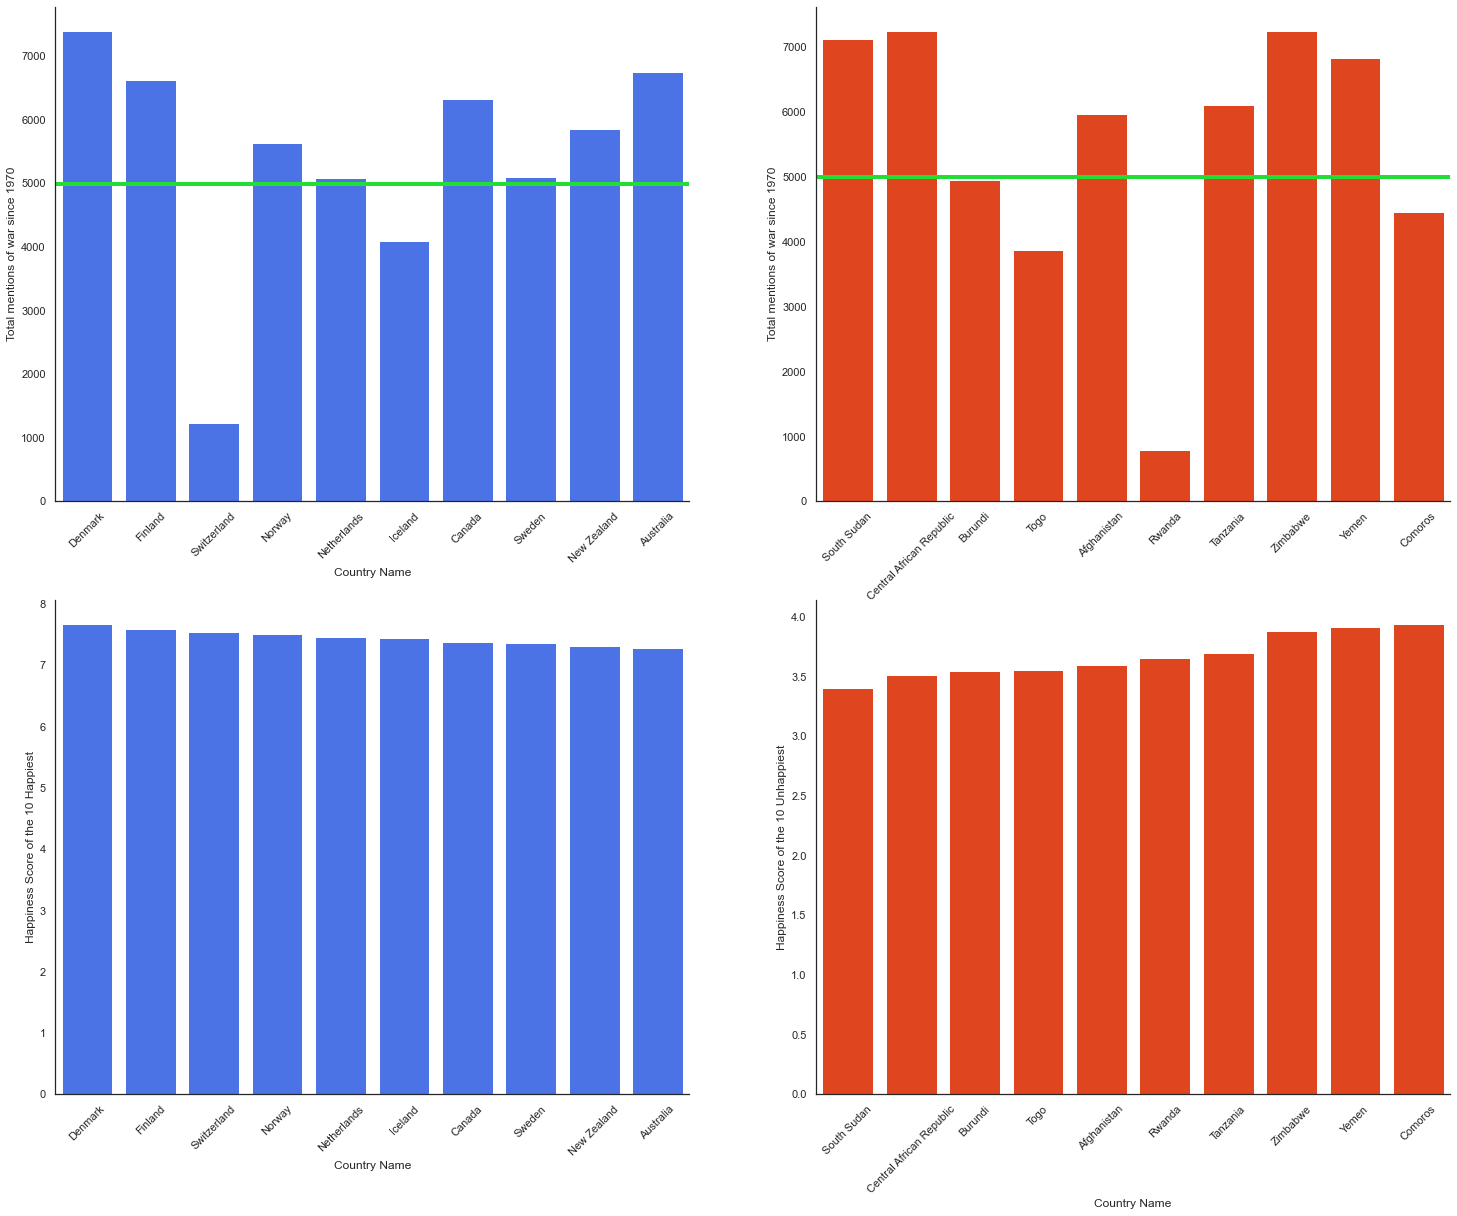

In [69]:
sns.set_theme(style="white")
fig, axes = plt.subplots(2,2, figsize=(25, 20))

## Happiest countries:


p1 = sns.barplot(ax=axes[1, 0], data=df_happy_final, x='Country name', y='Life Ladder', color='#3366ff')
p1.set_xticklabels(p1.get_xticklabels(), rotation=45) 

p2 = sns.barplot(ax=axes[0, 0], data=df_happy_final, x='Country name', y='Count', color='#3366ff')
p2.set_xticklabels(p1.get_xticklabels(), rotation=45) 
p2.axhline(sum(item_count_global["Count"])/df_speech['ISO-alpha3 Code'].nunique(), color= "#22dd33", linewidth=4)

    ## Setting labels 
    
axes[1,0].set(xlabel='Country Name', ylabel='Happiness Score of the 10 Happiest')
axes[0,0].set(xlabel='Country Name', ylabel='Total mentions of war since 1970')

    ## Unhappiest Countries:

p3 = sns.barplot(ax=axes[1, 1], data=df_unhappy_final, x='Country name', y='Life Ladder', color='#ff3300')
p3.set_xticklabels(p3.get_xticklabels(), rotation=45)

p4 = sns.barplot(ax=axes[0, 1], data=df_unhappy_final, x='Country name', y='Count', color='#ff3300')
p4.set_xticklabels(p4.get_xticklabels(), rotation=45) 
p4.axhline(sum(item_count_global["Count"])/df_speech['ISO-alpha3 Code'].nunique(), color= "#22dd33", linewidth=4)
    
    ## Setting label
    
axes[1,1].set(xlabel='Country Name', ylabel='Happiness Score of the 10 Unhappiest')
axes[0,1].set(xlabel='Country Name', ylabel='Total mentions of war since 1970')
sns.despine()
